### 2021_10_19_5

### 평가지표
* 회귀(Regression)
    * 결정계수(0 ~ 1), MAE, MSE, RMSE, RMLSE, MAPE
* 분류(Classification)
    * 오차행렬 or 혼동행렬(Confusion matrix)
    * 정확도(accuracy), 정밀도(precision), 민감도(Sensitivity, Recall, TPrage), 특이도, Fprate

In [1]:
from IPython.display import display, Image
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 01. 데이터 셋 준비
* 데이터 셋
    * 손글씨 데이터
    * data : 1797장, 64개의 pixel 데이터
        * images : 1797, 8, 8
    * target : 0~9까지의 손글씨 값
    * pixel : 화소(텔레비전·컴퓨터 화면의 화상을 구성하는 최소 단위)
        * 화면 이미지들은 더 이상 쪼개지지 않는 사각형의 작은 점들이 모여 이뤄진다. 이때 이미지를 구성하는 최소 단위를 픽셀이라고 한다.

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


<AxesSubplot:ylabel='count'>

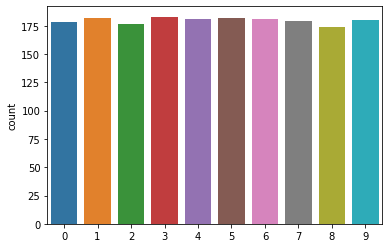

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique(digits.target))
sns.countplot(digits.target)

### Target 값을 이진값으로 만들기
### 데이터 셋의 Target을 9 : 1의 비율로 나누기
* 9이면 True
* 9가 아니면 False

In [5]:
X = digits.data          # 입력
y = digits.target == 9   # 출력

np.unique(y)

array([False,  True])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Text(0.5, 1.0, 'test')

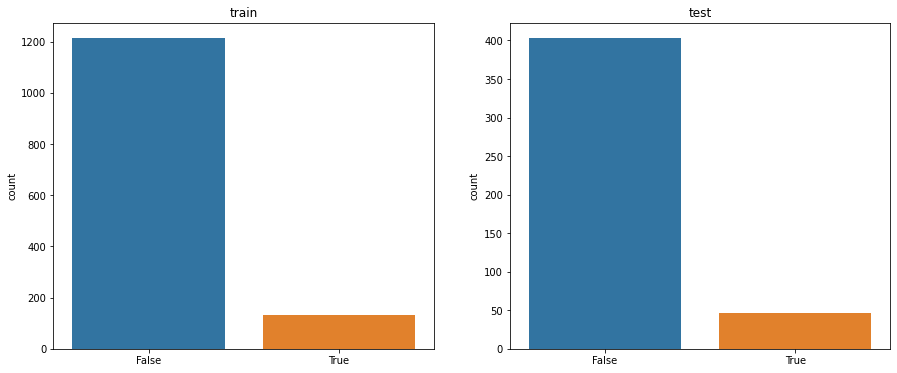

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# y_train의 값 확인
sns.countplot(y_train)
plt.title("train")

plt.subplot(1, 2, 2)
# y_test의 값 확인
sns.countplot(y_test)
plt.title("test")

## 02. 다양한 모델의 평가
* 정확도(accuracy) 확인

### 의사결정트리 모델

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("정확도(accuracy) : {:.2f}".format(tree.score(X_test, y_test)))

정확도(accuracy) : 0.92


### LogisticRegression 모델

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
pred_log = logreg.predict(X_test)

print("정확도(accuracy) : {:.2f}".format(logreg.score(X_test, y_test)))

정확도(accuracy) : 0.98


### RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("정확도(accuracy) : {:.2f}".format(rf.score(X_test, y_test)))

정확도(accuracy) : 0.98


### DummyClassifier
* 간단한 규칙을 사용하여 예측을 수행한다.
* 실제 프로젝트에서 사용하지 않으며, 간단한 베이스라인 모델로서 사용된다.
* DummyClassifier(strategy='most_frequent') : 학습용 세트에서 가장 많이 있는 Label(라벨)을 예측한다.
    * most_frequent : 가장 많이 있는 Label(라벨)을 예측
    * stratified : 클래스 분포를 존중하여 예측을 생성
    * uniform : 무작위로 균일하게 예측을 생성 ,
    * 기타 : prior, constant

* 아래 모델은 가장 많은 레이블을 가진 False만 예측하게 된다.

In [13]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_model.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("정확도(accuracy) : {:.2f}".format(dummy_model.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
정확도(accuracy) : 0.90


### 03. 오차행렬(confusion matrix)

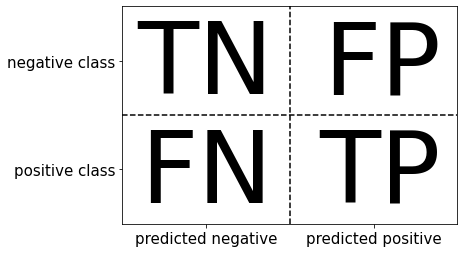

In [14]:
import mglearn

mglearn.plots.plot_binary_confusion_matrix()

### confusion_matrix 를 이용한 오차(혼동) 행렬 구하기

In [19]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log)
print("오차 행렬 : \n{}".format(confusion))

오차 행렬 : 
[[399   4]
 [  7  40]]


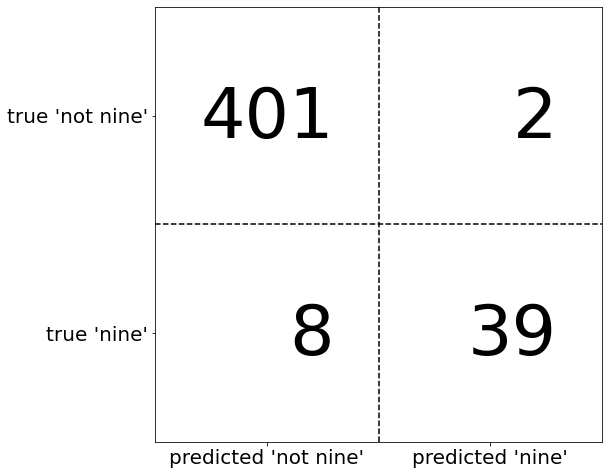

In [20]:
mglearn.plots.plot_confusion_matrix_illustration()

In [23]:
print("정확도 : {}".format((39 + 401) / (39 + 8 + 2 + 401)))
print("정밀도 : {}".format((39) / (39 + 2)))
print("민감도 : {}".format((39) / (39 + 8)))
print("특이도 : {}".format((401) / (401 + 2)))
print("FPRate : {}".format((2) / (401 + 2)))

정확도 : 0.9777777777777777
정밀도 : 0.9512195121951219
민감도 : 0.8297872340425532
특이도 : 0.9950372208436724
FPRate : 0.004962779156327543


In [25]:
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

print("정확도 : {}".format((TP + TN) / (TP + FP + FN + TN)))
print("정밀도 : {}".format((TP) / (TP + FP)))
print("민감도 : {}".format((TP) / (TP + FN)))
print("특이도 : {}".format((TN) / (FP + TN)))
print("FPRate : {}".format((FP) / (FP + TN)))

정확도 : 0.9755555555555555
정밀도 : 0.9090909090909091
민감도 : 0.851063829787234
특이도 : 0.9900744416873449
FPRate : 0.009925558312655087


* 이진 분류에서는 정밀도와 재현율을 가장 많이 사용.
    * 분야마다 다른 지표를 사용할 수 있다.
    
### F-score

* 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 정밀도, 재현율이다.
* 정밀도와 재현율은 중요한 측정 방법이지만, 둘중의 하나의 방법으로 전체 그림을 보기가 어렵다.
* 정밀도와 민감도(recall,재현율)을 하나만 가지고 측정이 안된다. 정밀도(precision)와 재현율(recall)의 조화 평균인 f-점수 또는 f-측정은 이 둘을 하나로 요약을 해 줍니다.